In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
df = pd.read_csv("../input/advertising/advertising.csv", encoding='ISO-8859-1')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


<Axes: ylabel='Count'>

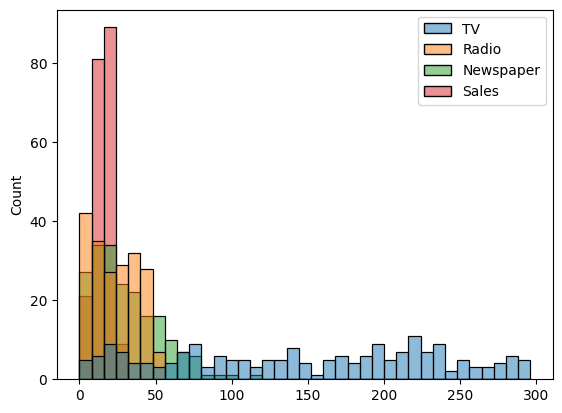

In [18]:
sns.histplot(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


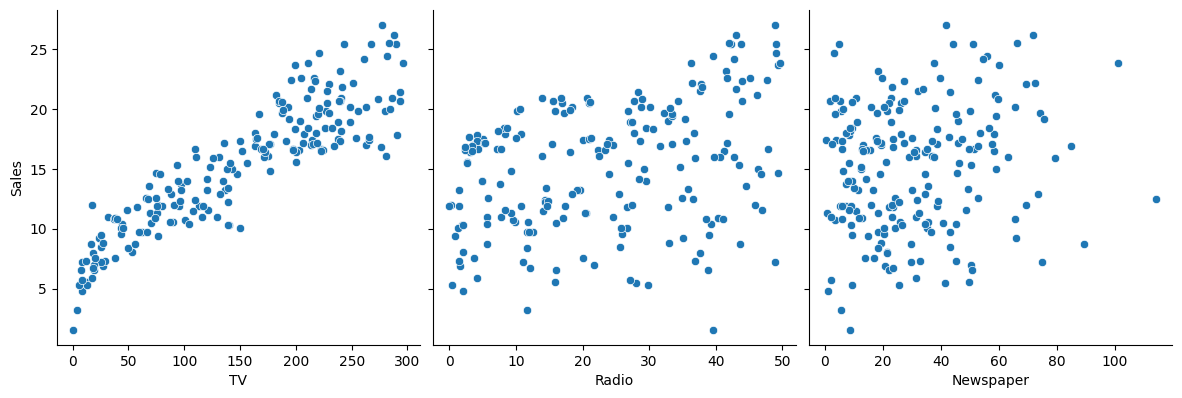

In [20]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

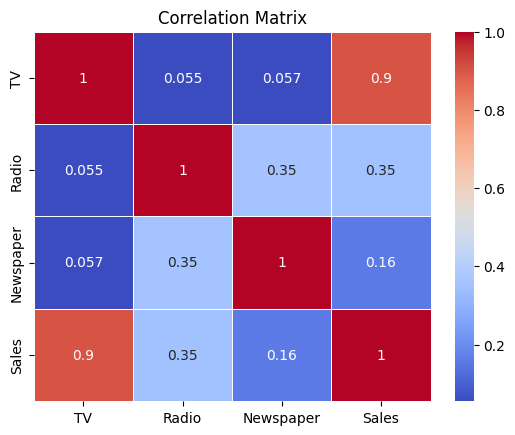

In [21]:
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [25]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [30]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 1.1792263981480782
MSE: 2.416149779306332
R-squared: 0.930053801697557


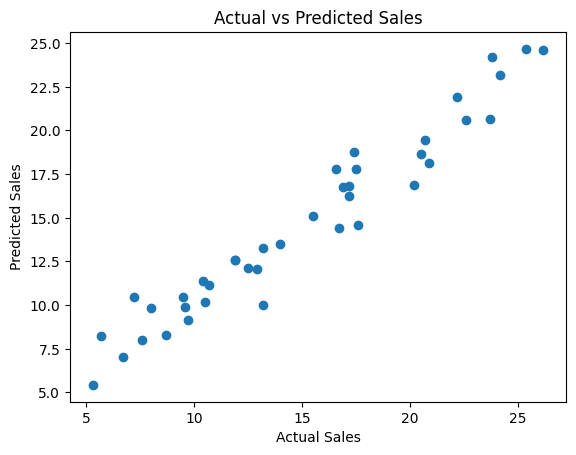

In [31]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

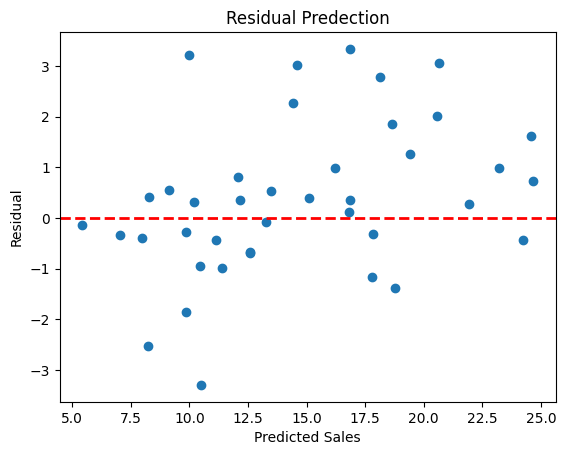

In [34]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Sales')
plt.ylabel('Residual')
plt.title('Residual Predection')
plt.show()

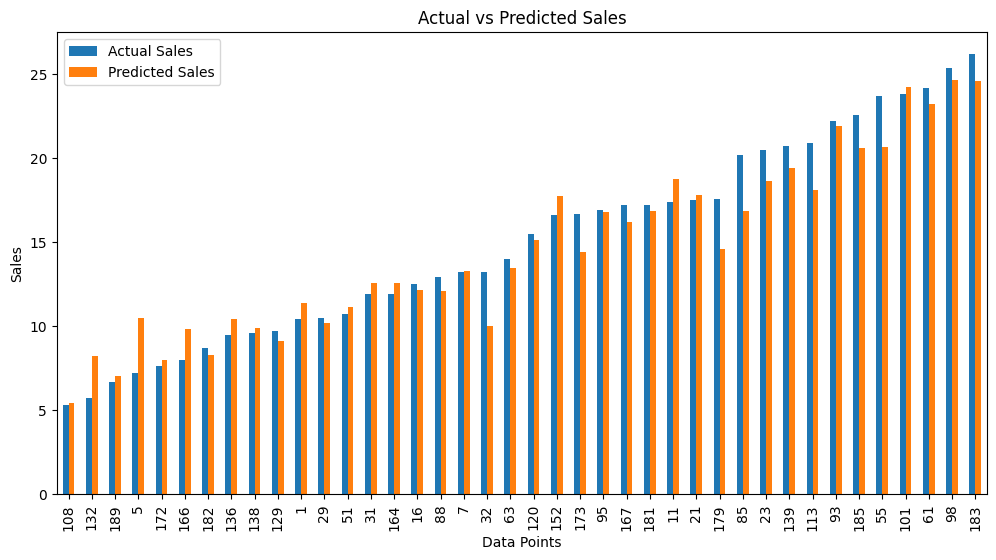

In [37]:
results_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': predictions})

results_df = results_df.sort_values(by='Actual Sales')
results_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


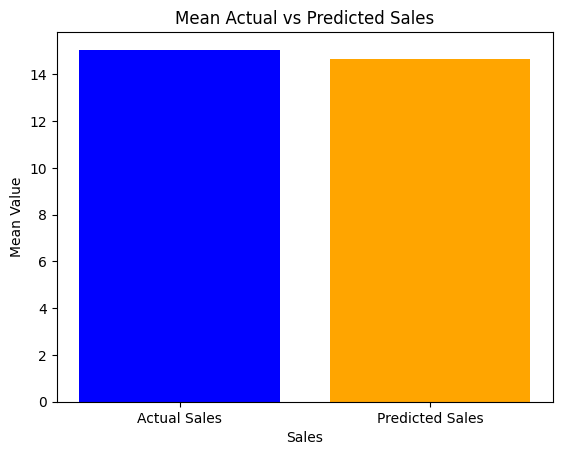

In [38]:
mean_actual_sales = results_df['Actual Sales'].mean()
mean_predicted_sales = results_df['Predicted Sales'].mean()

plt.bar(['Actual Sales', 'Predicted Sales'], [mean_actual_sales, mean_predicted_sales], color=['blue', 'orange'])
plt.xlabel('Sales')
plt.ylabel('Mean Value')
plt.title('Mean Actual vs Predicted Sales')
plt.show()
